LABORATORIO 4 ( DESENFOQUE SELECTIVO DE UN PUNTO FOCAL)

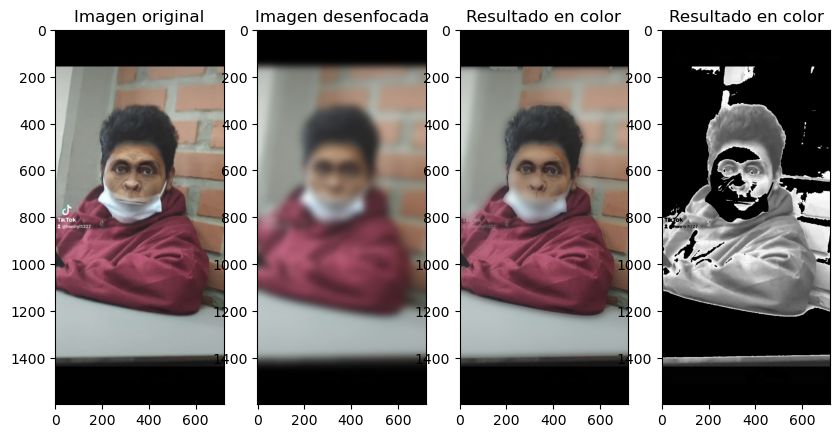

In [22]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread('Monin.jpeg')
imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbral_inc_bi = cv2.threshold(imagen_gray, 127, 255, cv2.THRESH_BINARY_INV) 
_, a = cv2.threshold(umbral_inc_bi, 127, 255, cv2.THRESH_BINARY_INV) 

_, umbralbi = cv2.threshold(imagen_gray, 127, 255, cv2.THRESH_BINARY)

_,umb_tozero_inv=cv2.threshold(imagen_gray,127,255,cv2.THRESH_TOZERO_INV)

mascara = np.zeros_like(umb_tozero_inv, dtype=np.uint8)

contornos, _ = cv2.findContours(umbralbi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

img_desenfocada = cv2.GaussianBlur(imagen, (95, 95), 0)

# Crear la imagen resultante aplicando la máscara desenfocada a la imagen original
img_resultante = np.copy(imagen)
img_resultante[mascara != 0] = img_desenfocada[mascara != 0]

plt.figure(figsize=(10, 5))

# Referencia al array de las imágenes
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(img_desenfocada, cv2.COLOR_BGR2RGB))
plt.title('Imagen desenfocada')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(img_resultante, cv2.COLOR_BGR2RGB))
plt.title('Resultado en color')

plt.subplot(1, 4, 4)
plt.imshow(umb_tozero_inv, cmap='gray')
plt.title('Resultado en color')

plt.show()


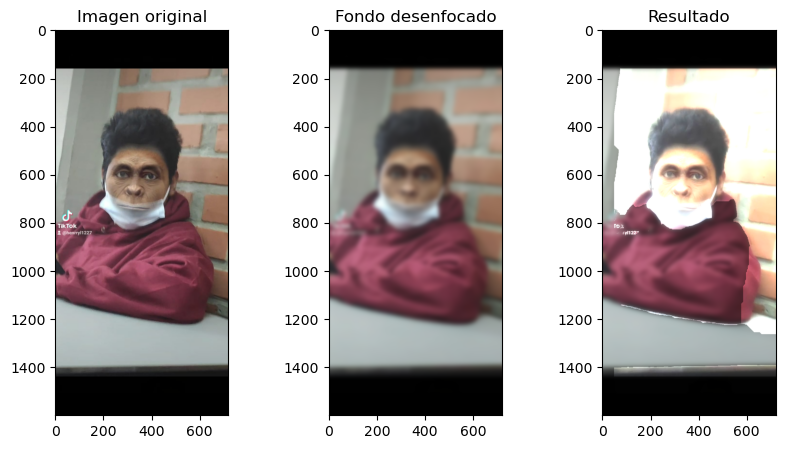

In [15]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('Monin.jpeg')

# Crear una máscara inicial con todas las regiones marcadas como fondo
mask = np.zeros(imagen.shape[:2], np.uint8)

# Definir una región de interés (ROI) que rodea aproximadamente a la persona en la imagen
rect = (50, 50, imagen.shape[1]-50, imagen.shape[0]-50)

# Aplicar el algoritmo GrabCut para segmentar la imagen en primer plano y fondo
bgd_model = np.zeros((1,65),np.float64)
fgd_model = np.zeros((1,65),np.float64)
cv2.grabCut(imagen, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Crear una máscara donde los píxeles marcados como probablemente fondo y fondo se convierten en cero
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# Aplicar un desenfoque gaussiano al fondo de la imagen
background = cv2.GaussianBlur(imagen, (55, 55), 0)

# Multiplicar la máscara por la imagen original para mantener solo el primer plano
foreground = cv2.multiply(imagen, cv2.merge((mask2, mask2, mask2)))

# Combinar el primer plano y el fondo desenfocado
img_resultante = cv2.add(foreground, background)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Fondo desenfocado')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_resultante, cv2.COLOR_BGR2RGB))
plt.title('Resultado')

plt.show()


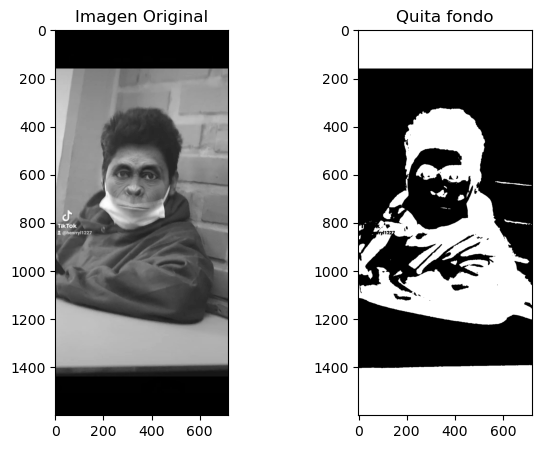

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('Monin.jpeg',0)


_, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


img_contours = cv2.findContours (thresh, cv2. RETR_TREE, cv2. CHAIN_APPROX_SIMPLE) [-2] 
img_contours = sorted (img_contours, key=cv2.contourArea)
for i in img_contours: 
    if cv2. contourArea (i) > 100:
        break



mask = np. zeros (img . shape [ : 2], np. uint8) 
cv2. drawContours (mask, [i], -1, 255, -1) 
new_img = cv2.bitwise_and (img, img, mask=mask) 

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img,cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 4, 2)
plt.imshow(thresh,cmap='gray')
plt.title('Quita fondo')
plt.show()



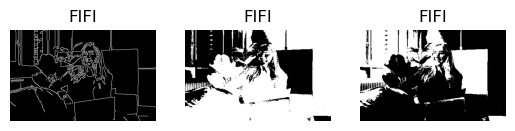

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread('coso.jpeg')
 

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
_, umbral_inc_bi = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) 
_, a = cv2.threshold(umbral_inc_bi, 127, 255, cv2.THRESH_BINARY_INV) 
plt.subplot(131)
plt.title('FIFI')
plt.imshow(edges ,cmap='gray')
plt.axis('off')
    
plt.subplot(132)
plt.title('FIFI')
plt.imshow(umbral_inc_bi ,cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('FIFI')
plt.imshow(a ,cmap='gray')
plt.axis('off')

plt.show()

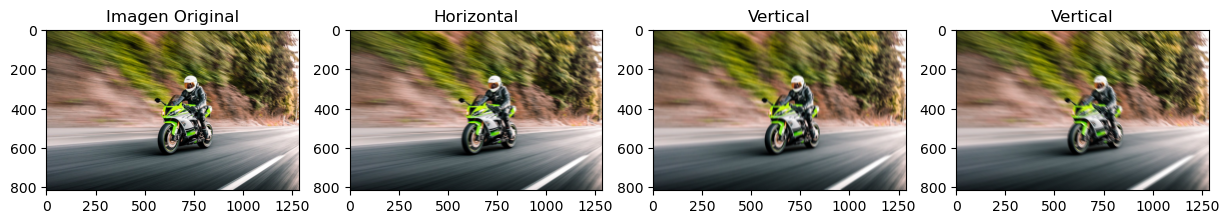

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv_horizontal(img, mascara1):
    mascara = np.ones((1, mascara1), np.float32) / mascara1
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

def conv_vertical(img, mascara1):
    mascara = np.ones((mascara1, 1), np.float32) / mascara1
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

def conv_diagonal(img, mascara_size):
    mascara = np.identity(mascara_size, dtype=np.float32) / mascara_size
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

image = cv2.imread('moto.jpeg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_r = conv_horizontal(img_rgb[:,:,0], 11)
img_g = conv_horizontal(img_rgb[:,:,1], 11)
img_b = conv_horizontal(img_rgb[:,:,2], 11)

img_r_vertical = conv_vertical(img_rgb[:,:,0], 11)
img_g_vertical = conv_vertical(img_rgb[:,:,1], 11)
img_b_vertical = conv_vertical(img_rgb[:,:,2], 11)

img_r_diagonal = conv_diagonal(img_rgb[:,:,0], 11)
img_g_diagonal = conv_diagonal(img_rgb[:,:,1], 11)
img_b_diagonal = conv_diagonal(img_rgb[:,:,2], 11)

img_fin = np.stack([img_r, img_g, img_b], axis=2)
img_fin_vertical = np.stack([img_r_vertical, img_g_vertical, img_b_vertical], axis=2)
img_fin_diagonal = np.stack([img_r_diagonal, img_g_diagonal, img_b_diagonal], axis=2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')

plt.subplot(1, 4, 2)
plt.imshow(img_fin)
plt.title('Horizontal')

plt.subplot(1, 4, 3)
plt.imshow(img_fin_vertical)
plt.title('Vertical')

plt.subplot(1, 4, 4)
plt.imshow(img_fin_diagonal)
plt.title('Vertical')

plt.show()
